### Import the libraries

In [5]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

### Load the saved model

In [6]:
model = load_model("brain_tumor_classifier.h5")

### Define class names (must match your training)

In [7]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

### Function to upload and predict

In [8]:
def upload_and_predict():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and preprocess image
        img = image.load_img(file_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict
        pred = model.predict(img_array)
        pred_class = np.argmax(pred, axis=1)[0]

        # Display image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[pred_class]}")
        plt.axis("off")
        plt.show()

### Create tkinter window

1/1 [==============================] - 6s 6s/step


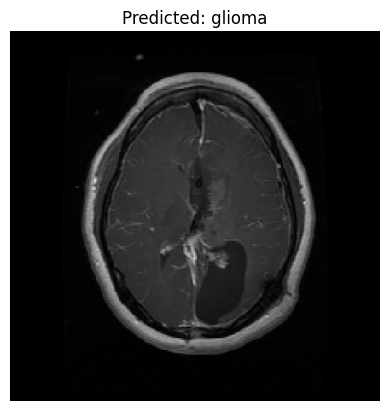

In [9]:
root = tk.Tk()
root.title("Brain Tumor Classifier")
root.geometry("300x100")

upload_button = tk.Button(root, text="Upload MRI Image", command=upload_and_predict)
upload_button.pack(pady=20)

root.mainloop()